In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [18]:
sample_submission_dir = '/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv'
train_data_dir = '/kaggle/input/tabular-playground-series-may-2022/train.csv'
test_data_dir = '/kaggle/input/tabular-playground-series-may-2022/test.csv'

train_df = pd.read_csv(train_data_dir)
test_df = pd.read_csv(test_data_dir)
combined_df = pd.concat([train_df,test_df])

In [19]:
print("Train data shape : ", train_df.shape)
print("Test data shape : ", test_df.shape)
print("Overall data shape : ",combined_df.shape)
display(train_df.head())
display(train_df.info())
display(train_df.describe().transpose())

Train data shape :  (900000, 33)
Test data shape :  (700000, 32)
Overall data shape :  (1600000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

None

,count,mean,std,min,25%,50%,75%,max
id,900000.0,449999.500000,259807.765473,0.000000,224999.750000,449999.500000,674999.250000,899999.000000
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000


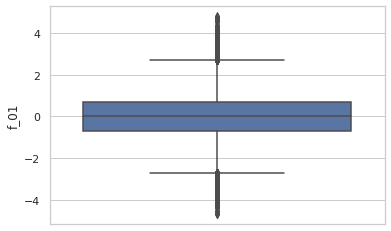

In [20]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y="f_01", data=train_df)

In [21]:
train_df['f_27']

0         ABABDADBAB
1         ACACCADCEB
2         AAAEABCKAD
3         BDBBAACBCB
4         BDBCBBCHFE
             ...    
899995    BABBCBBBED
899996    BBBGBBDQBE
899997    AEBEDBBHBA
899998    ADBAAADDAE
899999    BCAACADSCE
Name: f_27, Length: 900000, dtype: object

In [22]:
for column in combined_df.columns:
    print(f"Number of unique elements in column {column} : ", combined_df[column].nunique())

Number of unique elements in column id :  1600000
Number of unique elements in column f_00 :  1600000
Number of unique elements in column f_01 :  1600000
Number of unique elements in column f_02 :  1600000
Number of unique elements in column f_03 :  1600000
Number of unique elements in column f_04 :  1600000
Number of unique elements in column f_05 :  1600000
Number of unique elements in column f_06 :  1600000
Number of unique elements in column f_07 :  17
Number of unique elements in column f_08 :  16
Number of unique elements in column f_09 :  16
Number of unique elements in column f_10 :  16
Number of unique elements in column f_11 :  15
Number of unique elements in column f_12 :  17
Number of unique elements in column f_13 :  14
Number of unique elements in column f_14 :  14
Number of unique elements in column f_15 :  15
Number of unique elements in column f_16 :  16
Number of unique elements in column f_17 :  15
Number of unique elements in column f_18 :  14
Number of unique eleme

In [23]:
combined_df['f_27'].str.split('',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,,A,B,A,B,D,A,D,B,A,B,
1,,A,C,A,C,C,A,D,C,E,B,
2,,A,A,A,E,A,B,C,K,A,D,
3,,B,D,B,B,A,A,C,B,C,B,
4,,B,D,B,C,B,B,C,H,F,E,
...,...,...,...,...,...,...,...,...,...,...,...,...
699995,,B,C,B,C,E,B,H,M,C,D,
699996,,B,A,A,B,C,A,D,Q,F,C,
699997,,A,A,A,J,C,B,G,Q,B,A,
699998,,B,C,B,B,C,A,B,N,D,E,


In [24]:
# numerical_column_names = [c for c in combined_df.columns if combined_df[c].nunique()>20 if c not in(['id','target', 'f_27'])]

f_27_label_encoder = LabelEncoder()       
f_27_expanded = combined_df['f_27'].str.split('',expand=True)
f_27_label_encoder.fit(np.unique(f_27_expanded.values.flatten()))
# f_27_label_encoder.fit()

# for column in f_27_expanded.columns:
#     if column != 0 and column != 11:
#         temp_encoder = LabelEncoder() # Initialize temporary encoders
#         temp_encoder.fit(f_27_expanded[column])
#         temp_name = f'f_27_{column}'
#         f_27_label_encoders[temp_name] = temp_encoder

train_df['f_27_set_len'] = train_df['f_27'].apply(lambda x: len(set(x)))
        
# numerical_columns = combined_df[numerical_column_names]
# scaler = StandardScaler()
# scaler.fit(numerical_columns)

In [25]:
def memory_reduce(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != 'object' and col_type != "datetime64[ns]":
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

In [26]:
def data_process(
    data,
#     numerical_column_names=numerical_column_names,
    f_27_encoder=None,
#     scaler=None,
    val_split=True,
    val_split_ratio=0.2,
    encode=True,
    standardize=True,
    shrink=True,
    drop_encoded=True,
):
    print(data.columns)
    if encode:
        expanded_f_27 = data['f_27'].str.split('',expand=True)
        for column in expanded_f_27.columns:
            if column != 0 and column != 11:
                data[f'f_27_{column}'] = f_27_encoder.transform(expanded_f_27[column])
        if drop_encoded:
            data = data.drop('f_27',axis=1)
    if shrink:
        data = memory_reduce(data)
    
    y = data['target']
    X = data.drop(['id','target'],axis=1)
    if standardize:
        quantile_scaler = QuantileTransformer(n_quantiles=100, random_state=0)
        X = quantile_scaler.fit_transform(X)
    if val_split:
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=val_split_ratio, random_state=1)
        return X_train, X_val, y_train, y_val
    else:
        return X, y

In [27]:
X_train, X_val, y_train, y_val = data_process(
    data=train_df,
    f_27_encoder=f_27_label_encoder,
#     scaler=scaler,
    shrink=False,
)
# display(X_train.head())
# display(X_train.describe().transpose())
# display(X_train.info())
print("Transformed data sample : \n")
display(X_train[:1])
print("Transformed data mean : \n")
display(X_train.mean(axis=1))
print("Transformed data max : \n")
display(X_train.max(axis=1))
print("Transformed data min : \n")
display(X_train.min(axis=1))

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target', 'f_27_set_len'],
      dtype='object')
Transformed data sample : 



array([[0.75679516, 0.8376295 , 0.82821236, 0.53978947, 0.7811149 ,
        0.16256436, 0.06438404, 0.55050505, 0.        , 0.68181818,
        0.85858586, 0.99158249, 0.15151515, 0.48484848, 0.68181818,
        0.52525253, 0.52525253, 0.        , 0.74747475, 0.08844244,
        0.37986506, 0.60548901, 0.74944548, 0.98297569, 0.60939535,
        0.38811127, 0.99083468, 0.67455059, 1.        , 0.        ,
        0.49494949, 0.        , 0.2979798 , 1.        , 0.75757576,
        0.44444444, 1.        , 0.45959596, 0.28282828, 0.3030303 ,
        0.24242424]])

Transformed data mean : 



array([0.53466051, 0.51828046, 0.51940034, ..., 0.48384658, 0.37894672,
       0.53456901])

Transformed data max : 



array([1., 1., 1., ..., 1., 1., 1.])

Transformed data min : 



array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(
    eta0=0.1, # Learning rate of the model
    random_state=1
)
perceptron_model.fit(
    X_train,
    y_train
)
perceptron_prediction = perceptron_model.predict(X_val)
perceptron_accuracy = (perceptron_prediction==y_val).sum()/y_val.shape[0]
print("Perceptron model accuracy is : ", perceptron_accuracy)

Perceptron model accuracy is :  0.5974


In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(
    n_estimators=25, # Number of trees generated in the model
    random_state=1,
    n_jobs=2 # Making parallel computing by using 2 cores
)
forest_model.fit(X_train,y_train)
forest_prediction = forest_model.predict(X_val)
forest_accuracy = (forest_prediction == y_val).sum()/y_val.shape[0]
print("Random Forest model accuracy : ", forest_accuracy)

Random Forest model accuracy :  0.8601888888888889


In [43]:
def nnmodel(inputs):
    """
    Perceptron model.
    """
    layer_activation = 'swish'
    # Adding layers together. All layers consist of simple dense layers
    layer_x = tf.keras.layers.Dense(32,name='dense_1',activation=layer_activation)(inputs)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(64,name='dense_2',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(128,name='dense_3',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(128,name='dense_4',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(64,name='dense_5',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(32,name='dense_6',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)

    layer_x = tf.keras.layers.Dense(16,name='dense_7',activation=layer_activation)(layer_x)
    # layer_x = tf.keras.layers.BatchNormalization()(layer_x)
#     layer_x = tf.keras.layers.Dropout(0.1)(layer_x)
    linear_reg_layer = tf.keras.layers.Dense(1,name='output_layer',activation='linear')(layer_x)

    model = tf.keras.Model(
        inputs=inputs,
        outputs=linear_reg_layer,
        name='linear_reg_model'
    )
    return model

In [46]:
tf.keras.backend.clear_session()
# Acquiring a mirrored strategy to use multiple cores on GPU
strategy = tf.distribute.MultiWorkerMirroredStrategy()
BUFFER_SIZE = len(X_train)
BATCH_SIZE_PER_REPLICA = 2048
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
train_dataset_tensor = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(GLOBAL_BATCH_SIZE)
validation_dataset_tensor = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(GLOBAL_BATCH_SIZE)

In [53]:
callback_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=12, 
    verbose=1
)

callback_reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    min_lr=1e-4,
    patience=20,
    verbose=1
)

callbacks = [
    callback_early_stopping,
    callback_reduce_lr
]

In [54]:
model = nnmodel(tf.keras.Input(shape=(X_train.shape[-1],)))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(
    train_dataset_tensor,
    epochs=200,
    validation_data=validation_dataset_tensor,
#     batch_size=2048
    callbacks=callbacks
)

Epoch 1/200
352/352 [==============================] - 3s 8ms/step - loss: 0.7190 - accuracy: 0.5981 - val_loss: 0.5917 - val_accuracy: 0.6938
Epoch 2/200
352/352 [==============================] - 3s 8ms/step - loss: 0.5749 - accuracy: 0.7126 - val_loss: 0.5640 - val_accuracy: 0.7283
Epoch 3/200
352/352 [==============================] - 3s 7ms/step - loss: 0.6242 - accuracy: 0.6617 - val_loss: 0.5765 - val_accuracy: 0.7124
Epoch 4/200
352/352 [==============================] - 3s 8ms/step - loss: 0.5488 - accuracy: 0.7378 - val_loss: 0.5375 - val_accuracy: 0.7464
Epoch 5/200
352/352 [==============================] - 3s 8ms/step - loss: 0.5343 - accuracy: 0.7491 - val_loss: 0.5258 - val_accuracy: 0.7588
Epoch 6/200
352/352 [==============================] - 3s 7ms/step - loss: 0.5080 - accuracy: 0.7674 - val_loss: 0.4875 - val_accuracy: 0.7753
Epoch 7/200
352/352 [==============================] - 3s 8ms/step - loss: 0.6263 - accuracy: 0.6650 - val_loss: 0.5443 - val_accuracy: 0.7463

In [ ]:
tf.__version__